# <u>Estimating Logical Error Rates for the Surface Code</u>

## **Part 1: Setting Up the Stabilizer Code** 

---

The $L=3$ (unrotated) surface code arranges qubits on a grid as follows:

<img src="./Figures/Tutorial-surfacequbits.svg" width="300">

Note the labeling of the qubits in purple.

* We have $n=13$ physical qubits here.
* Additionally, it turns out that this code will encode $k=1$ logical qubit and has a code distance of $d=3$ (we don't worry about this analysis).
* We call this a $[[ 13, 1, 3 ]]$ quantum (CSS) code.

We create such a code with a `StabCode` object:

In [2]:
from scalerqec.QEC.qeccircuit import StabCode

surface_code = StabCode(n=13, k=1, d=0)

The stabilizers of the code are defined as follows:

<img src="./Figures/Tutorial-surfacestabs.svg" width="300">

We can then read off the expressions for the $X$ and $Z$ stabilizers:
* $X$ stabilizers
    * $S_1 = X \otimes I \otimes I \otimes X \otimes I \otimes X \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I$
    * $S_2 = I \otimes X \otimes I \otimes X \otimes X \otimes I \otimes X \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I$
    * $S_3 = I \otimes I \otimes X \otimes I \otimes X \otimes I \otimes I \otimes X \otimes I \otimes I \otimes I \otimes I \otimes I$
    * $S_4 = I \otimes I \otimes I \otimes I \otimes I \otimes X \otimes I \otimes I \otimes X \otimes I \otimes X \otimes I \otimes I$
    * $S_5 = I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes X \otimes I \otimes X \otimes X \otimes I \otimes X \otimes I$
    * $S_6 = I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes X \otimes I \otimes X \otimes I \otimes I \otimes X$

$\Longrightarrow H_X =
\begin{pmatrix}
1&0&0&1&0&1&0&0&0&0&0&0&0\\
0&1&0&1&1&0&1&0&0&0&0&0&0\\
0&0&1&0&1&0&0&1&0&0&0&0&0\\
0&0&0&0&0&1&0&0&1&0&1&0&0\\
0&0&0&0&0&0&1&0&1&1&0&1&0\\
0&0&0&0&0&0&0&1&0&1&0&0&1
\end{pmatrix}$

* $Z$ stabilizers
    * $S_7 = Z \otimes Z \otimes I \otimes Z \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I$
    * $S_8 = I \otimes Z \otimes Z \otimes I \otimes Z \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I$
    * $S_9 = I \otimes I \otimes I \otimes Z \otimes I \otimes Z \otimes Z \otimes I \otimes Z \otimes I \otimes I \otimes I \otimes I$
    * $S_{10} = I \otimes I \otimes I \otimes I \otimes Z \otimes I \otimes Z \otimes Z \otimes I \otimes Z \otimes I \otimes I \otimes I$
    * $S_{11} = I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes Z \otimes I \otimes Z \otimes Z \otimes I$
    * $S_{12} = I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes Z \otimes I \otimes Z \otimes Z$

$\Longrightarrow H_Z =
\begin{pmatrix}
1&1&0&1&0&0&0&0&0&0&0&0&0\\
0&1&1&0&1&0&0&0&0&0&0&0&0\\
0&0&0&1&0&1&1&0&1&0&0&0&0\\
0&0&0&0&1&0&1&1&0&1&0&0&0\\
0&0&0&0&0&0&0&0&1&0&1&1&0\\
0&0&0&0&0&0&0&0&0&1&0&1&1
\end{pmatrix}$

Adding these to our `QECStab` object as strings:


In [3]:
surface_code.add_stab("XIIXIXIIIIIII")
surface_code.add_stab("IXIXXIXIIIIII")
surface_code.add_stab("IIXIXIIXIIIII")
surface_code.add_stab("IIIIIXIIXIXII")
surface_code.add_stab("IIIIIIXIXXIXI")
surface_code.add_stab("IIIIIIIXIXIIX")

surface_code.add_stab("ZZIZIIIIIIIII")
surface_code.add_stab("IZZIZIIIIIIII")
surface_code.add_stab("IIIZIZZIZIIII")
surface_code.add_stab("IIIIZIZZIZIII")
surface_code.add_stab("IIIIIIIIZIZZI")
surface_code.add_stab("IIIIIIIIIZIZZ")

Since the code has $k=1$ logical qubit, we must have one logical $\bar{X}$ and logical $\bar{Z}$ operator for this logical qubit. For the surface code, they are defined as follows:

<img src="./Figures/Tutorial-surfacelogicals.svg" width="600">

As a tensor product, these are:
* $\bar{X} = X \otimes X \otimes X \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I \otimes I$
* $\bar{Z} = Z \otimes I \otimes I \otimes I \otimes I \otimes Z \otimes I \otimes I \otimes I \otimes I \otimes Z \otimes I \otimes I$

We add the logical $\bar{Z}$ operator to our `StabCode` object, where the first argument denotes the index of the logical qubit (we only have one logical qubit at index 0 here) and the second denotes the logical operator as a string. (The logical $\bar{X}$ operator can be derived from the logical $\bar{Z}$ by finding an anticommuting Pauli-$X$ string in $\ker H_Z / \operatorname{rs} H_X$.)

In [4]:
surface_code.set_logical_Z(0, "ZIIIIZIIIIZII")

Error propagation does not reduce the effective code distance for the unrotated surface code. Therefore, we can do standard syndrome extraction. As an example, this looks like the following for an $X$ stabilizer.

<img src="./Figures/Tutorial-surfacesyndrome.svg" width="300">

In other words, that $X$ stabilizer takes the $X$ parity of physical qubits 1, 3, 4 and 6. Then, the syndrome qubit is measure in $Z$ (computational / $\{\ket{0}, \ket{1}\}$) basis. This syndrome will detect $Z$ errors.

An analogous measurement scheme is done for $X$ stabilizers. This is all encompassed in the "standard" parity measurement scheme (other options: "Shor", "Knill", "Flag"):


In [5]:
surface_code.scheme = "Standard"

Additionally, we perform two rounds of syndrome extraction. This means that each stabilizer is measured twice. At the end, we will take the parity of those two syndrome outcomes. We call this result a detector outcome. If this result is even, then the two rounds agreed; otherwise they disagreed. 

In [6]:
surface_code.rounds = 2

Given the stabilizers and measurement scheme that we specified, we can now compile the stabilizer code to a quantum circuit (in Stim) corresponding with a single function call to `construct_circuit()`. This circuit will have 13 physical qubits, 12 syndrome qubits (one for each $X$ and $Z$ stabilizer -- between each round of syndrome extraction, we measure the syndrome qubit and reset it's value for the next round) and syndrome extraction will be done given the stabilizers we specified. 

In [7]:
surface_code.construct_circuit()

A clean way to make sure that out circuit was compiled correctly is to see the intermediate representation (IR). We can do so with a function `show_IR()`. The key is below, where `X`, `Y`, `Z` are some placeholders for numbers:
* `cX = Prop[r, s] str`: The `X`th stabilizer check during syndrome extraction round `r` corresponding to stabilizer `s`, with string representation `str`.
* `dX = Parity cY cZ`: The `X`th detector is the parity of checks `Y` and `Z`
* `oX = Parity cY`: The `X`th detector is the exact same result as check `Y`.

In [8]:
surface_code.show_IR()

c0 = Prop[r=0, s=0] XIIXIXIIIIIII
c1 = Prop[r=0, s=1] IXIXXIXIIIIII
c2 = Prop[r=0, s=2] IIXIXIIXIIIII
c3 = Prop[r=0, s=3] IIIIIXIIXIXII
c4 = Prop[r=0, s=4] IIIIIIXIXXIXI
c5 = Prop[r=0, s=5] IIIIIIIXIXIIX
c6 = Prop[r=0, s=6] ZZIZIIIIIIIII
c7 = Prop[r=0, s=7] IZZIZIIIIIIII
c8 = Prop[r=0, s=8] IIIZIZZIZIIII
c9 = Prop[r=0, s=9] IIIIZIZZIZIII
c10 = Prop[r=0, s=10] IIIIIIIIZIZZI
c11 = Prop[r=0, s=11] IIIIIIIIIZIZZ
c12 = Prop[r=1, s=0] XIIXIXIIIIIII
d0 = Parity c0 c12
c13 = Prop[r=1, s=1] IXIXXIXIIIIII
d1 = Parity c1 c13
c14 = Prop[r=1, s=2] IIXIXIIXIIIII
d2 = Parity c2 c14
c15 = Prop[r=1, s=3] IIIIIXIIXIXII
d3 = Parity c3 c15
c16 = Prop[r=1, s=4] IIIIIIXIXXIXI
d4 = Parity c4 c16
c17 = Prop[r=1, s=5] IIIIIIIXIXIIX
d5 = Parity c5 c17
c18 = Prop[r=1, s=6] ZZIZIIIIIIIII
d6 = Parity c6 c18
c19 = Prop[r=1, s=7] IZZIZIIIIIIII
d7 = Parity c7 c19
c20 = Prop[r=1, s=8] IIIZIZZIZIIII
d8 = Parity c8 c20
c21 = Prop[r=1, s=9] IIIIZIZZIZIII
d9 = Parity c9 c21
c22 = Prop[r=1, s=10] IIIIIIIIZIZZI
d10 = Parity

Additionally, one can export this stabilizer circuit to STIM format directly:

In [9]:
print(surface_code.stimcirc)

R 13
H 0
CX 0 13
H 0 3
CX 3 13
H 3 5
CX 5 13
H 5
M 13
R 14
H 1
CX 1 14
H 1 3
CX 3 14
H 3 4
CX 4 14
H 4 6
CX 6 14
H 6
M 14
R 15
H 2
CX 2 15
H 2 4
CX 4 15
H 4 7
CX 7 15
H 7
M 15
R 16
H 5
CX 5 16
H 5 8
CX 8 16
H 8 10
CX 10 16
H 10
M 16
R 17
H 6
CX 6 17
H 6 8
CX 8 17
H 8 9
CX 9 17
H 9 11
CX 11 17
H 11
M 17
R 18
H 7
CX 7 18
H 7 9
CX 9 18
H 9 12
CX 12 18
H 12
M 18
R 19
CX 0 19 1 19 3 19
M 19
R 20
CX 1 20 2 20 4 20
M 20
R 21
CX 3 21 5 21 6 21 8 21
M 21
R 22
CX 4 22 6 22 7 22 9 22
M 22
R 23
CX 8 23 10 23 11 23
M 23
R 24
CX 9 24 11 24 12 24
M 24
R 13
H 0
CX 0 13
H 0 3
CX 3 13
H 3 5
CX 5 13
H 5
M 13
R 14
H 1
CX 1 14
H 1 3
CX 3 14
H 3 4
CX 4 14
H 4 6
CX 6 14
H 6
M 14
R 15
H 2
CX 2 15
H 2 4
CX 4 15
H 4 7
CX 7 15
H 7
M 15
R 16
H 5
CX 5 16
H 5 8
CX 8 16
H 8 10
CX 10 16
H 10
M 16
R 17
H 6
CX 6 17
H 6 8
CX 8 17
H 8 9
CX 9 17
H 9 11
CX 11 17
H 11
M 17
R 18
H 7
CX 7 18
H 7 9
CX 9 18
H 9 12
CX 12 18
H 12
M 18
R 19
CX 0 19 1 19 3 19
M 19
R 20
CX 1 20 2 20 4 20
M 20
R 21
CX 3 21 5 21 6 21 8 21
M 21
R 22
CX

## **Part 2: Testing Logical Error Rates**

---

* Our encoded qubit in the surface code will eventually be run in a noisy environment. This means that random unitary errors can be injected with probability $p$ in any qubit, in any location, at any point in the circuit. 
* Every so often, we will perform our 2 rounds of syndrome extraction (SE) for each stabilizer. This will output 12 detector outcomes characterizing the type of error that occured. 
* We pass these outcomes into a *decoder* which will determine a candidate correction to fix that error.

$$\text{1 logical qubit} \xrightarrow{\rm encode} [[ 13, 1, 3 ]]\text{ surface code} \xrightarrow{\rm noise} \text{errored code} \xrightarrow{\text{2 SE rounds}} \text{12 detector outcomes} \xrightarrow{\rm decoder} \text{``corrected'' code}$$

What we are interested in is how often this decoder fails (i.e., what if the "corrected" code is not the same as the original code?). Let's put this in math:
* Let $\ket{\psi}$ be the state of the logical qubit.
* Let $\ket{\bar{\psi}}$ be the encoded state of the logical qubit as a $[[ 13, 1, 3 ]]$ unrotated surface code.
* Let $E$ be the unitary error that happens.
* Let $C$ be the correction proposed by the decoder

We then have:

$$\ket{\psi} \xrightarrow{\rm encode} \ket{\bar{\psi}} \xrightarrow{\rm noise} E\ket{\bar{\psi}} \xrightarrow{\text{2 SE rounds + decoder}} CE\ket{\bar{\psi}}$$

A logical error *did not* occur if $CE \in \mathcal{S} = \langle S_1,\dots,S_{12}\rangle = \left\{\prod_{i=1}^{12} S_i^{a_i} \;:\; a_i\in\{0,1\}\right\}$, which means that the correction applied on the error is generated by the stabilizer group, meaning that it acts trivially on the codespace. A logical error *did* occur if $CE \in \bar{\mathcal{P}}_n = \left\{ \bar{X}^a \bar{Z}^b S \; : \; a, b \in \{0, 1\}, S\in \mathcal{S} \right\}$, which means that the correction applied on the error creates a logical Pauli operator.

Suppose we encode our logical qubit, perform 2 rounds of syndrome extraction, and decode $N$ times. Let's say that out of these $N$ runs, a logical error occurs $K$ times. The logical error rate as a function of physical error rate $p$ is defined as:

$$\begin{equation} P_L(p) = \lim_{N \rightarrow \infty}\dfrac{K}{N}. \end{equation}$$

Equivalently, this is simply the probability that the decoder produces a logical fault.


Before we estimate logical error rates, let us create our noise model. We set the rate of a physical error to be $p = 1/1000$. We then create a `NoiseModel` object which simply encompasses the fact that we insert random Pauli errors, in random locations, on random qubits, with probability $p$.

In [10]:
from scalerqec.QEC.noisemodel import NoiseModel

p = 0.001
noise_model = NoiseModel(p)

## Methods for estimating Logical Error Rate

1. **Monte-Carlo Sampling**
    * This method is simple. Take Equation $(1)$, choose $K$ to be high (say 100) and then brute force the formula $K/N$ by counting how many samples $N$ you took by the time you reach $K=100$ failures.
    * We can simulate that for the surface code as follows:
    
        - Create a calculator object specifying $K=100$.
        - Use `calculate_LER_from_StabCode()` to estimate the logical error rate of our surface code using our specified noise model. Also, we repeat 3 times and take the average for a closer estimate.

In [11]:
from scalerqec.Monte.monteLER import MonteLERcalc

calc = MonteLERcalc(MIN_NUM_LE_EVENT=10000000)
calc.calculate_LER_from_StabCode(surface_code, noise_model, repeat=10)

Time(STIM):  1.90(+0.04)*10^-1
PL(STIM):  2.92(+0.01)*10^-2
Nerror(STIM):  1.46(+0.01)*10^4
Sample(STIM):  5.00(+0.00)*10^5


2. **Symbolic Solution**
    - This method will use a dynamic programming formula (exponential complexity) to calculate the exact logical error rate.
    - Similarly, we create a calculator object, input our `StabCode` circuit and noise model, and the LER is computed directly.
    - The output is a polynomial of the LER as a function of the physical error rate $p$, the numerical LER using the `NoiseModel`'s value of $p$, and the result of plugging that value of $p$ into the symbolic expression (these should be the exact same)

Note that since the formula is exponential in size, the code will take a while to run. Expected output:

```md
LER polynomial: (Very long polynomial starting with \frac{10474820164370959656688 p^{296}}{19683} - \frac{110942718998694654723080 p^{295}}{729})
Evaluated LER at p=0.001 is 0.0291365848804056
Symbolic LER:  0.0291365848804056
```

In [ ]:
from scalerqec.Symbolic.symbolicLER import SymbolicLERcalc

calc = SymbolicLERcalc()        
ler = calc.calculate_LER_from_StabCode(surface_code, noise_model)
print("Symbolic LER: ", ler)

---Step2: Generate the prediction table---
Total detector outcome:  4096
---Step2: construction QEPG--------------
---Step3: calculating error indices--------------
---Step4: dynamic algorithm--------------


3. **Stratified Curve Fitting**
    - The main observation of this method is that for different Pauli error-weight subspaces (meaning a different number of errors injected into the circuit) the curve behavior of error-weight $w$ vs. LER $P_L^w$ follows a predictable S-curve:

    <p align="center"> <img src="./Figures/Tutorial-extendedScurvehistogram.png" width="500"> </p>

    The equation of this curve is a modified sigmoid function $$P_L^w = \dfrac{1}{2+2\exp\left({-\frac{w-\mu}{\alpha}+\frac{\beta}{\sqrt{w-t}}}\right)}$$ where $\alpha$, $\beta$ are tunable parameters, $t = \left\lfloor \frac{d-1}{2} \right\rfloor$, and $\mu$ is the shifted shifted center of the sigmoid function representing the S-curve.

    - There are three main regions in this plot:
        - **Fault-tolerant region:** An $\llbracket n, k, d \rrbracket$ quantum error-correcting code can correct up to a weight-$\left\lfloor \frac{d-1}{2} \right\rfloor$ error. Therefore, for errors of weight less than this, the LER is 0 since all errors are correctable.
        - **Saturated region:** In this region, the weight of Pauli errors is so high that the error-correcting code cannot do anything to fix those errors. Therefore, at the end, measurement will be practically random and so about half the time we will fail and half the time we will succeed, resulting in a LER that converges to 0.5.
        - **Curve-fitting region:** This is the region of interest. For errors of weight between the fault-tolerant and saturated regions, we can perform curve-fitting. See details below.
    - The motive for why we want to curve-fit is that higher-weight errors are easier to sample via the Monte-Carlo method. This is because the number of error combinations of a weight-$w$ Pauli error in a circuit with $N$ error locations is $$\binom{3N}{w} = \frac{(3N)!}{w!(3N-w)!}. $$ ($\times 3$ because Pauli errors can be $X$, $Y$, or $Z$.) As $w$ increases, there are less error combinations to test, and so the Monte-Carlo method will run faster. Thus, if we sample high-weight subspaces, then fit the S curve, we can estimate what the LER is for lower-weight subspaces.
    - Finally, to get the LER of the entire circuit, we can use estimators for the parameters of $P_L^w$ and plug them into the following formula, which is motivated by the observation that $\lim_{N \rightarrow \infty }K \sim \text{Binom}(\sigma = \sqrt{Np(1-p)})$: $$\hat{P}_L = \sum_{w=pN-3\sigma}^{pN+3\sigma}\hat{P}_L^w \binom{N}{w} p^w (1-p)^{N-w}.$$
    - To simulate this strategy at a high-level using ScaLERQEC, we again create a calculator object, input our `StabCode` object, noise model, and rounds of repetition, and call `calculate_LER_from_StabCode()`.
    - The output contains both a plot in the logarithmic space (easier to fit) and the original fitted S-curve.

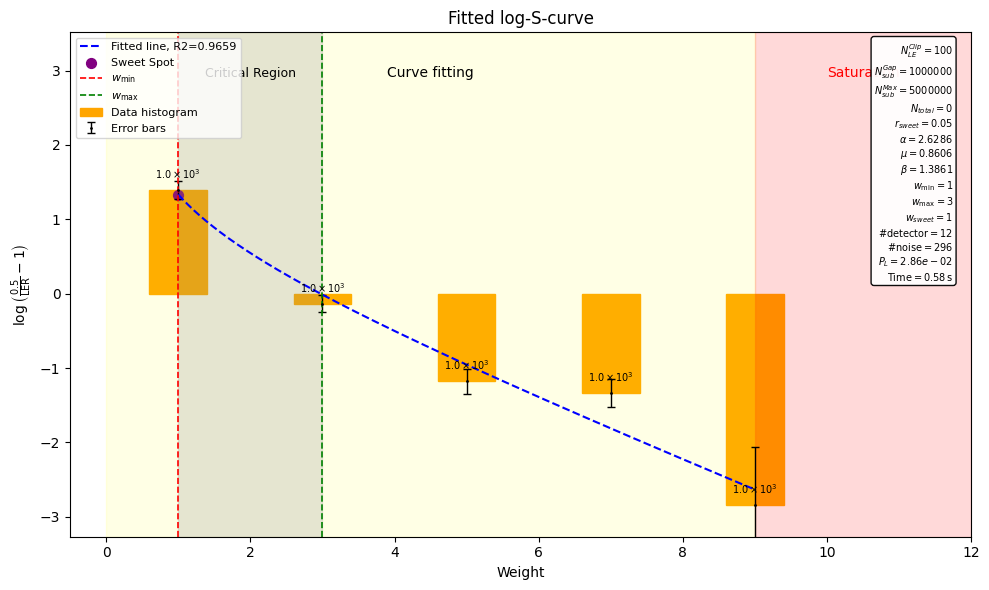

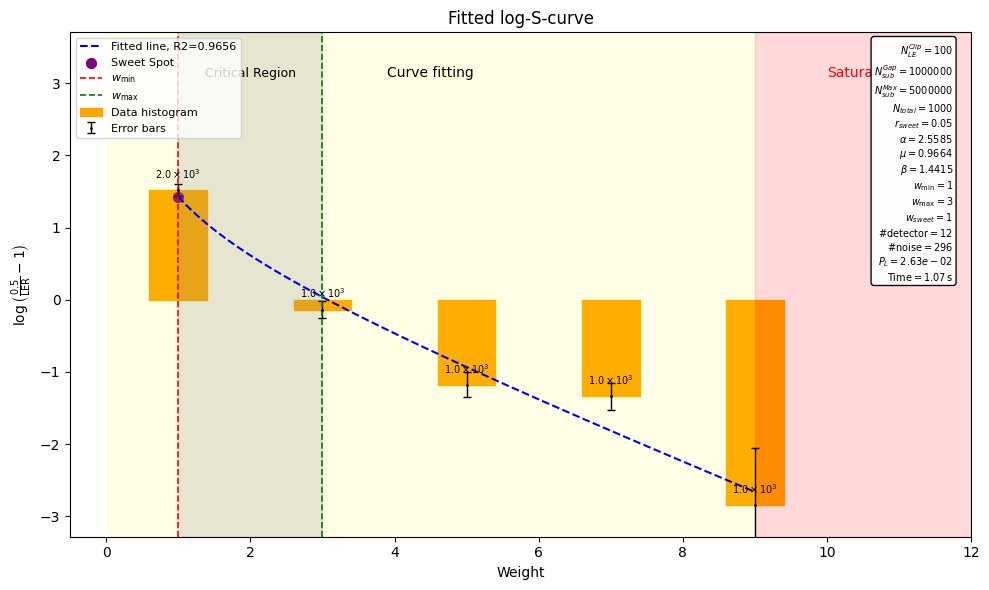

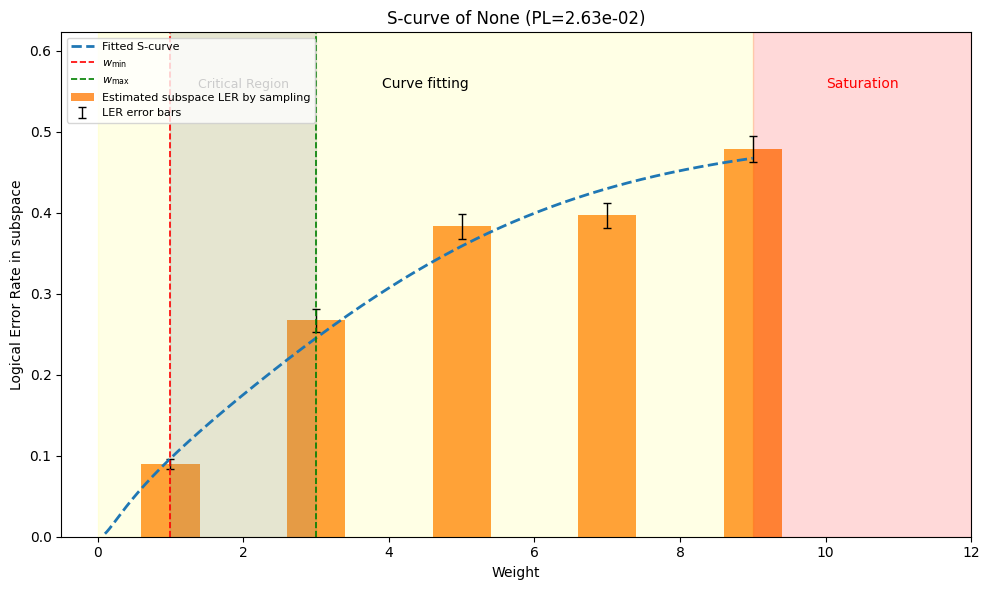

k:  3
beta:  4
Subspaces:  5
R2:  9.66(+0.00)*10^-1
Samples(ours):  6.00(+0.00)*10^3
Time(our):  1.40(+0.00)*10^0
PL(ours):  2.63(+0.00)*10^-2
Nerror(ours):  1.71(+0.00)*10^3


In [12]:
from scalerqec.Stratified import StratifiedScurveLERcalc
calculator = StratifiedScurveLERcalc()
calculator.calculate_LER_from_StabCode(surface_code, noise_model, savefigure=False, repeat=1)

4. **Stratified sampling**
    - This method will use the exact same binomial formula as Method 3 to calculate the LER, but instead of curve-fitting for lower-weight subspaces, all subspaces will be directly sampled.
    - We again create a calculator object, input our `StabCode` object, noise model, and rounds of repetition, and call `calculate_LER_from_StabCode` to compute the LER.

In [ ]:
from scalerqec.Stratified import StratifiedLERcalc
calculator = StratifiedLERcalc()
calculator.calculate_LER_from_StabCode(surface_code, noise_model, repeat=5)

Samples(ours):  3.32(+0.06)*10^4
Time(our):  2.92(+0.34)*10^-2
PL(ours):  3.17(+0.06)*10^-2
